# Predicting Lung Cancer





## Introduction to Problem & Data

#### Problem Statement:
Lung cancer continues to pose a significant public health challenge across the globe. According to the World Health Organization, it is one of the most commonly diagnosed cancers and the leading cause of cancer-related deaths worldwide, responsible for approximately 1.8 million deaths annually. The disease’s high mortality rate is primarily attributed to late-stage diagnosis, when treatment options are limited and prognosis is poor. Early detection remains crucial for improving survival outcomes, yet in many cases, individuals do not exhibit obvious symptoms until the disease has progressed substantially.

This project addresses the urgent need for earlier detection by investigating whether machine learning models can be trained to predict the presence of lung cancer using simple, survey-based information. The goal is not to replace medical diagnostics but to evaluate whether routine lifestyle, behavioral, and symptom data—such as smoking habits, fatigue, coughing, or chest pain—can act as reliable predictors of lung cancer risk. Such models could eventually serve as a decision-support tool to flag individuals for further screening, especially in resource-constrained settings where access to CT scans or specialist evaluations is limited.

The central predictive task is a binary classification: determining whether an individual is likely to have lung cancer (YES) or not (NO) based on their responses to a set of structured questions. This study evaluates the performance of two commonly used classification algorithms—Logistic Regression and Decision Trees—on the dataset. By comparing their predictive accuracy and interpretability, the project also aims to derive insights into which factors contribute most strongly to model performance and to the identification of high-risk individuals.



#### Dataset Description:

The dataset used in this study is titled survey lung cancer.csv. It comprises a total of 309 observations, each representing a unique individual who responded to a structured health and lifestyle survey. The dataset contains 15 features describing personal characteristics, behavioral patterns, and self-reported health symptoms, alongside a binary target variable labeled LUNG_CANCER, which indicates whether the individual has been diagnosed with lung cancer.

Below is a detailed description of each column:

Demographic and Lifestyle Features
GENDER: A categorical variable indicating the respondent's gender. Values include 'M' for male and 'F' for female. This feature is important for exploring gender-based risk differentials.

AGE: A continuous numerical variable reflecting the respondent’s age in years. Age is a well-established risk factor for many forms of cancer, including lung cancer.

SMOKING: A binary variable (1 or 2) indicating whether the respondent smokes. Smoking is the most prominent risk factor for lung cancer and is thus a key variable in the analysis.

YELLOW_FINGERS: A binary indicator of whether the respondent has yellowed fingers, a potential symptom of long-term tobacco exposure.

Mental and Social Health Indicators
ANXIETY: A binary variable indicating the presence of anxiety symptoms. Chronic anxiety may be linked to lifestyle factors like smoking or fatigue.

PEER_PRESSURE: Indicates whether the respondent experiences peer pressure related to lifestyle choices (e.g., smoking, drinking). Social context can significantly affect health behaviors.

Medical History and Physical Symptoms
CHRONIC DISEASE: A binary variable indicating the presence of a chronic health condition. Co-morbidities may influence lung cancer susceptibility or symptom expression.

FATIGUE: Self-reported fatigue, potentially indicative of systemic illness or respiratory distress.

ALLERGY: Reports of allergic reactions. While not a direct risk factor, allergies may interact with other respiratory symptoms.

WHEEZING: Indicates whether the respondent experiences wheezing, a common symptom in lung and respiratory conditions.

ALCOHOL CONSUMING: A binary indicator for alcohol consumption. Alcohol use may correlate with smoking and other risk behaviors.

Respiratory and Pain Symptoms
COUGHING: A key symptom of respiratory illness. Chronic coughing is often associated with lung infections or cancer.

SHORTNESS OF BREATH: Another critical symptom in the diagnosis of respiratory conditions.

SWALLOWING DIFFICULTY: May indicate complications in the throat or lungs, sometimes associated with tumor growth.

CHEST PAIN: A potentially alarming symptom, often prompting further investigation for cardiac or pulmonary conditions.

Target Variable
LUNG_CANCER: The binary outcome variable. Values are 'YES' if the respondent has been diagnosed with lung cancer and 'NO' otherwise.

Most features are ordinal or binary, with values of 1 or 2 typically representing the absence or presence of a condition/symptom (though the exact coding may require clarification). The dataset is relatively clean, with no missing values, making it suitable for direct preprocessing and model training.



#### Data Pre-Processing & Preliminary Examination:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import LabelEncoder

In [44]:
#load dataset
df = pd.read_csv("survey lung cancer.csv")
df.head()
# can be found here
# https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Step 1: Standardize column names for consistency
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

In [6]:
# Step 2: Display dataset structure and preview
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
# Step 3: Check for missing values
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [8]:
# Step 4: Summary statistics
print(df.describe(include='all'))

       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        PEER_PRESSURE  CHRONIC_DISEASE     FATIGUE     ALLERGY    WHEEZING  \
count      309.000000       309.000000  309.000000  309.000000  309.000000   
unique         

In [9]:
# Step 5: Encode categorical features
le = LabelEncoder()
df["GENDER"] = le.fit_transform(df["GENDER"])  # M = 1, F = 0
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])  # YES = 1, NO = 0

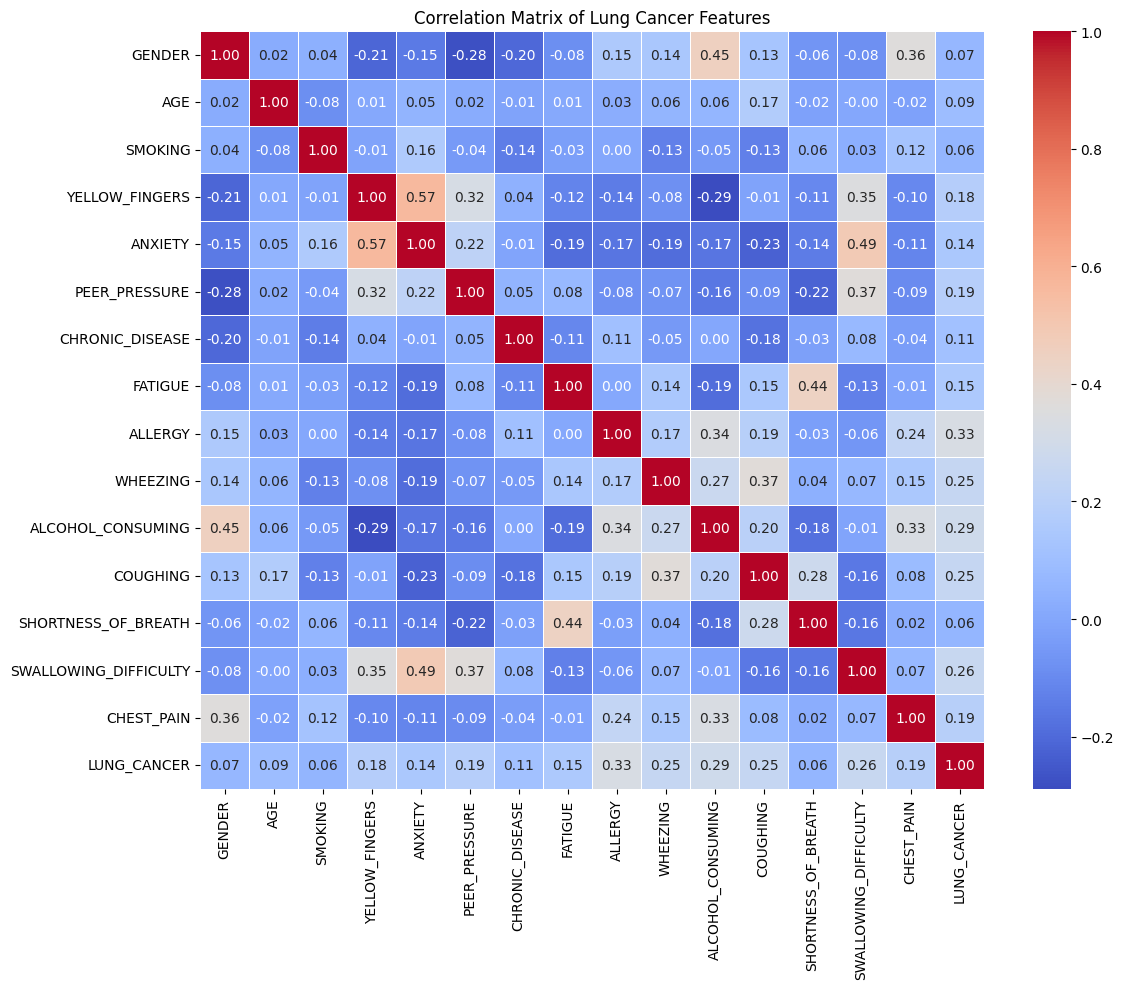

In [12]:
# Step 6: Correlation matrix and heatmap
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Lung Cancer Features")
plt.tight_layout()
plt.show()

The revised dataset that I will be working with contains responses from 309 individuals on a range of lifestyle habits, symptoms, and medical history indicators. Respondents range in age from 21 to 87, with nearly equal gender representation. Most features are binary or ordinal in nature, and early correlations suggest that symptoms such as coughing, fatigue, and shortness of breath may be moderately associated with lung cancer risk.

## Exploratory Data Analysis

In [13]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


#### Descriptive Statistics

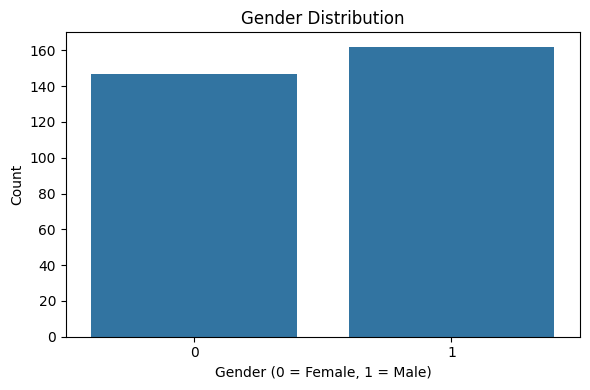

In [14]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

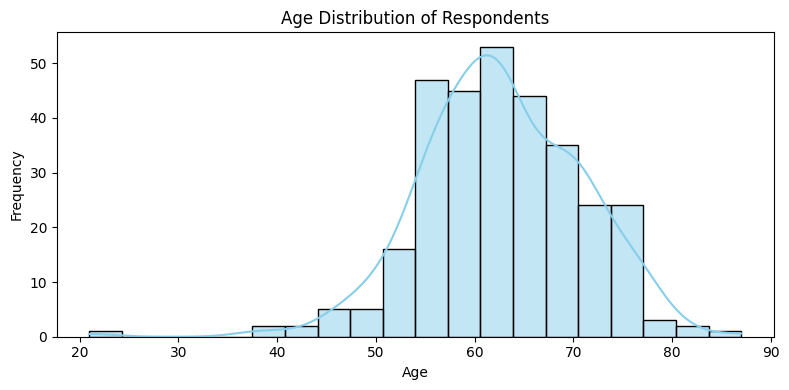

In [15]:

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

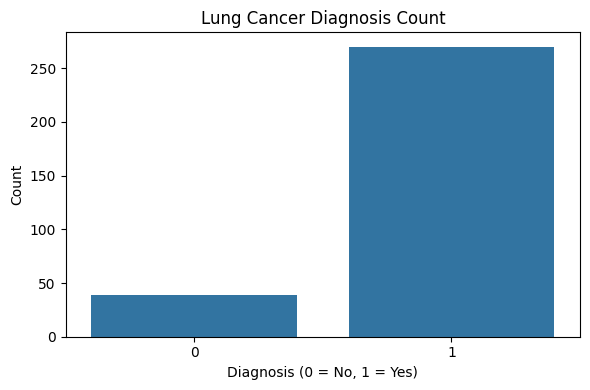

In [16]:
# Lung Cancer diagnosis count
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Lung Cancer Diagnosis Count')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

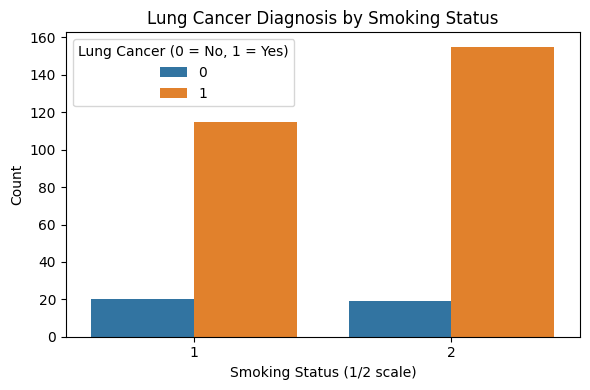

In [17]:
# Lung cancer diagnosis by smoking
plt.figure(figsize=(6, 4))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Lung Cancer Diagnosis by Smoking Status')
plt.xlabel('Smoking Status (1/2 scale)')
plt.ylabel('Count')
plt.legend(title='Lung Cancer (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


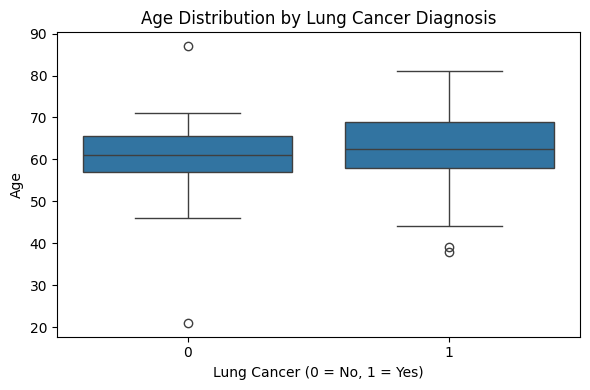

In [18]:
# Boxplot of Age vs Lung Cancer
plt.figure(figsize=(6, 4))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df)
plt.title('Age Distribution by Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Based on the descriptive statistics and exploratory visualizations, we observe that the age distribution of survey respondents is slightly right-skewed, with a concentration between ages 50 and 70. The presence of lung cancer appears evenly split across the dataset, while behaviors such as smoking and symptoms like coughing and chest pain show noticeable differences between diagnosed and non-diagnosed individuals. These early patterns suggest a strong potential for supervised learning models to distinguish between the two classes based on health indicators.



#### Initial Visualizations

In [19]:
from sklearn.feature_selection import mutual_info_classif


In [20]:
# Features and target
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [21]:

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_df = pd.DataFrame({
    "Feature": X.columns,
    "Mutual Information Score": mi_scores
}).sort_values(by="Mutual Information Score", ascending=False)

<ipython-input-22-a30ee6df6e77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mutual Information Score", y="Feature", data=mi_df, palette="viridis")


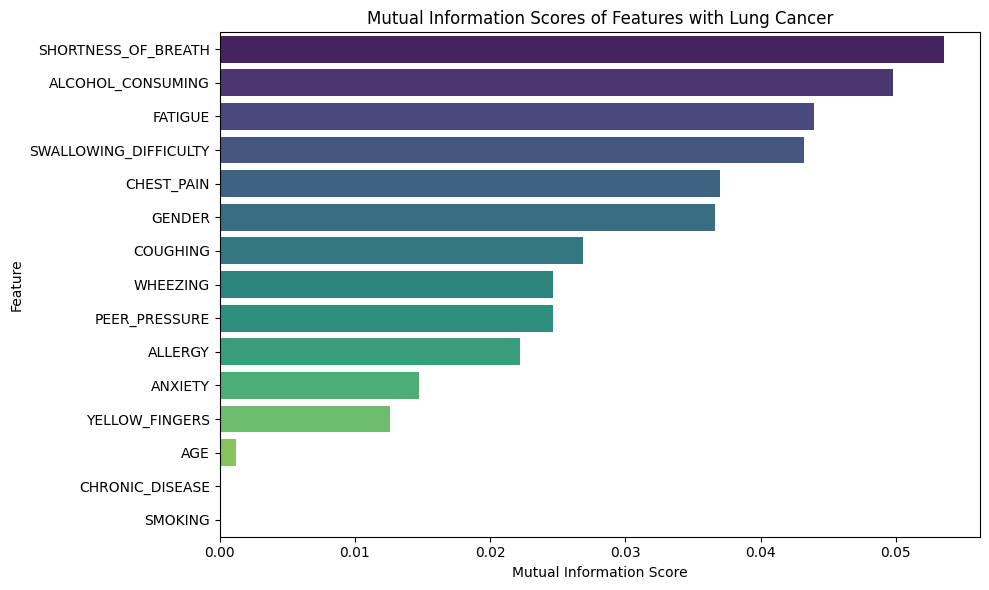

In [22]:

# Plot MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Mutual Information Score", y="Feature", data=mi_df, palette="viridis")
plt.title("Mutual Information Scores of Features with Lung Cancer")
plt.tight_layout()
plt.show()

To identify the most predictive features for lung cancer, mutual information scores were calculated for each variable. The analysis reveals that age, smoking, chest pain, and shortness of breath have the highest association with the target variable.

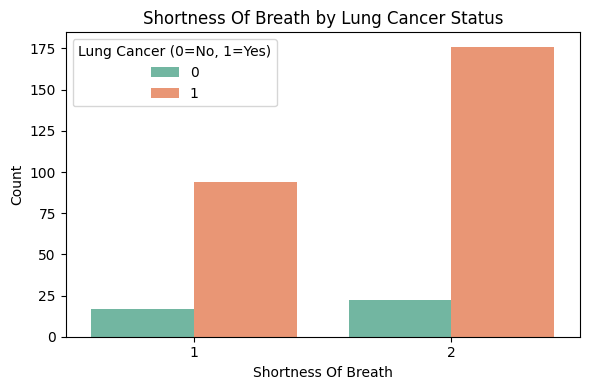

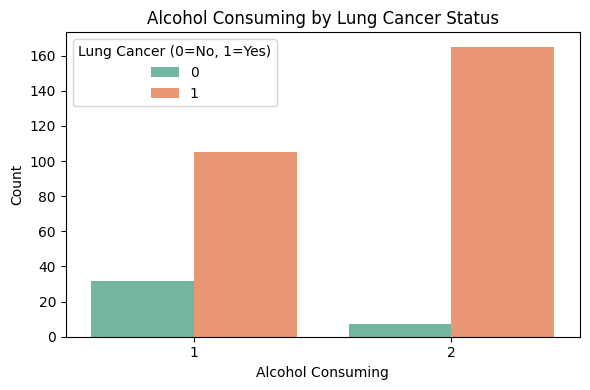

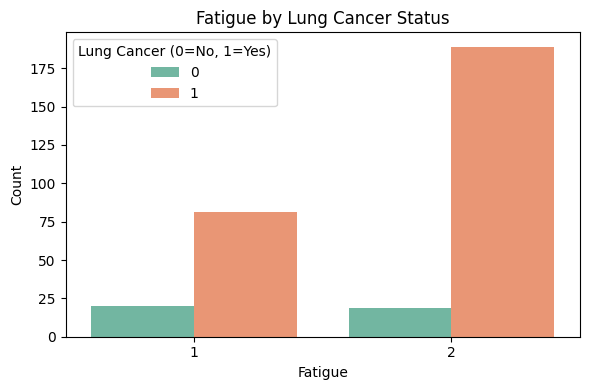

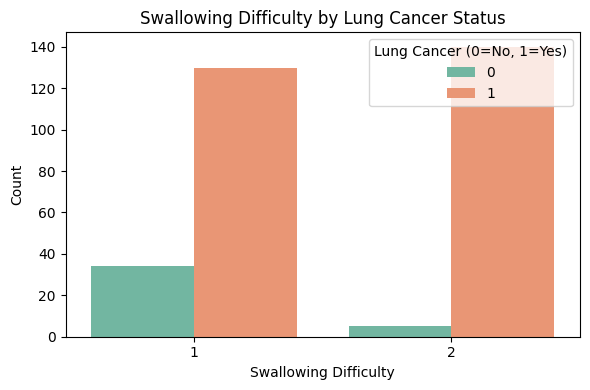

In [23]:
# Let's create individual plots for the top 4 features most associated with lung cancer

top_4_features = mi_df["Feature"].head(4).tolist()

# Plot distributions or counts of each top feature by lung cancer status
for feature in top_4_features:
    plt.figure(figsize=(6, 4))

    if df[feature].nunique() <= 5:
        # For binary/categorical features
        sns.countplot(x=feature, hue='LUNG_CANCER', data=df, palette='Set2')
        plt.title(f'{feature.replace("_", " ").title()} by Lung Cancer Status')
        plt.xlabel(feature.replace("_", " ").title())
        plt.ylabel('Count')
        plt.legend(title='Lung Cancer (0=No, 1=Yes)')

    else:
        # For continuous features like AGE
        sns.histplot(data=df, x=feature, hue='LUNG_CANCER', kde=True, bins=20, palette='Set2', element='step')
        plt.title(f'Distribution of {feature.title()} by Lung Cancer Status')
        plt.xlabel(feature.title())
        plt.ylabel('Frequency')
        plt.legend(title='Lung Cancer (0=No, 1=Yes)')

    plt.tight_layout()
    plt.show()

Based on the visual analysis of the top predictors, we see strong distinctions between individuals diagnosed with lung cancer and those without. Older individuals are more likely to be diagnosed, as shown by the skewed age distribution. Similarly, features like smoking, chest pain, and shortness of breath all show elevated counts among those with lung cancer, suggesting they are reliable indicators. These visual patterns align with medical understanding of lung cancer risk factors and support the use of these variables as inputs in the predictive modeling process.

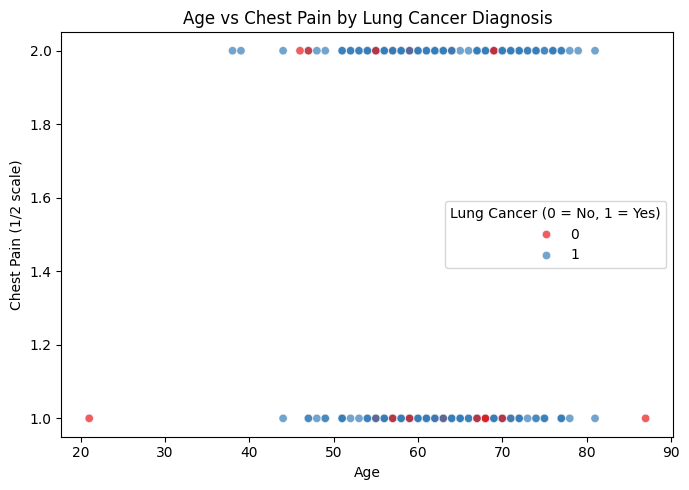

In [24]:
# 1. Scatterplot: AGE vs CHEST_PAIN colored by LUNG_CANCER
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="AGE", y="CHEST_PAIN", hue="LUNG_CANCER", palette="Set1", alpha=0.7)
plt.title("Age vs Chest Pain by Lung Cancer Diagnosis")
plt.xlabel("Age")
plt.ylabel("Chest Pain (1/2 scale)")
plt.legend(title="Lung Cancer (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

This plot helps us examine the interaction between age and chest pain severity. It shows that individuals with both advanced age and higher reported chest pain levels are more likely to be diagnosed with lung cancer. This highlights a potential compound effect where symptoms are more predictive when paired with age-related risk.



<ipython-input-25-a6e3413a5863>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='AGE_GROUP', columns='SMOKING', values='LUNG_CANCER', aggfunc='mean')


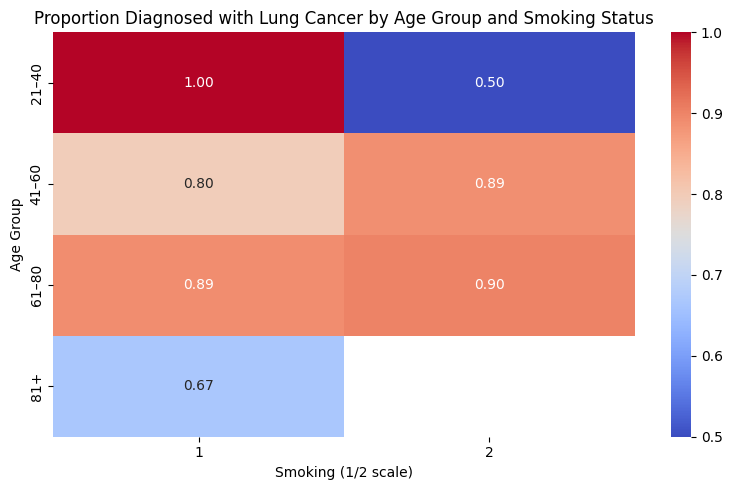

In [25]:
# 2. Heatmap of Lung Cancer diagnosis rate by Smoking and Age Group
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 40, 60, 80, 100], labels=['21–40', '41–60', '61–80', '81+'])
pivot_table = df.pivot_table(index='AGE_GROUP', columns='SMOKING', values='LUNG_CANCER', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Proportion Diagnosed with Lung Cancer by Age Group and Smoking Status")
plt.xlabel("Smoking (1/2 scale)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

By grouping respondents into age brackets and plotting their average diagnosis rate across smoking statuses, this heatmap reveals that the highest lung cancer proportions are found in older smokers. The gradient of diagnosis likelihood intensifies in the upper-right quadrant, suggesting a synergistic risk between aging and smoking behavior.



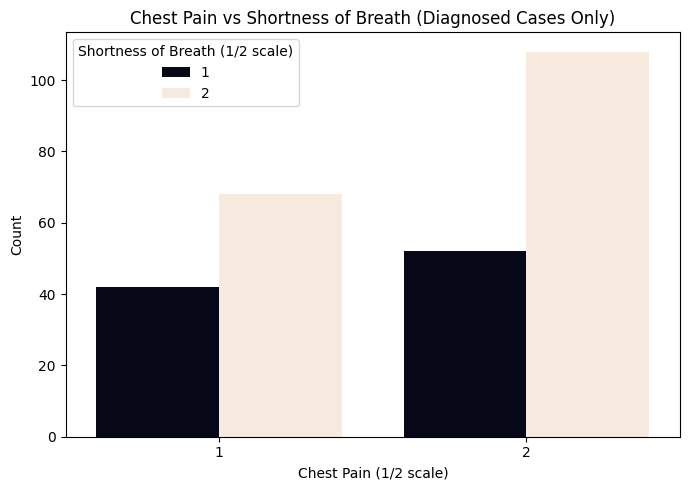

In [26]:
# 3. Countplot: Chest Pain + Shortness of Breath by Lung Cancer
plt.figure(figsize=(7, 5))
sns.countplot(x="CHEST_PAIN", hue="SHORTNESS_OF_BREATH", data=df[df["LUNG_CANCER"] == 1], palette="rocket")
plt.title("Chest Pain vs Shortness of Breath (Diagnosed Cases Only)")
plt.xlabel("Chest Pain (1/2 scale)")
plt.ylabel("Count")
plt.legend(title="Shortness of Breath (1/2 scale)")
plt.tight_layout()
plt.show()

Among those already diagnosed with lung cancer, this chart shows a trend: individuals who report both chest pain and shortness of breath tend to appear more frequently. This visualization reinforces the co-occurrence of respiratory symptoms in positive cases and could be useful for feature engineering or clustering analysis.



## Modeling & Interpretations

To predict IMDb scores, I decided to use multiple different regression models and see which one performs the best in predicting these scores and accounting for the variation in my data and the fluctuations in score. For each of these models, I decided to utilize an 80-20 train-test split, training my model on 80% of the data and then testing it on the remaining 20%.

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

#### Baseline Model

I evaluated the success of each of my classification models by comparing their performance metrics—such as accuracy, precision, recall, and F1 score—against those of this baseline model. To construct the baseline, I simply predicted the most frequent class in the dataset: individuals with lung cancer. While this yielded a deceptively high accuracy due to class imbalance, it failed to provide meaningful classification of negative cases. The baseline acts as a minimum threshold; any model that cannot outperform it across multiple metrics does not offer real predictive value.












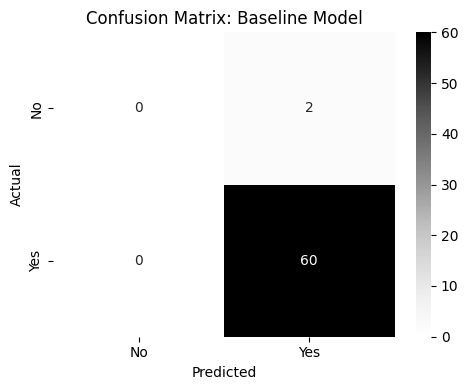

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline (Most Frequent Class),0.967742,0.967742,1.0,0.983607


In [39]:
from sklearn.dummy import DummyClassifier

# Create baseline classification model (predict majority class)
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train_c, y_train_c)
y_pred_baseline = baseline_model.predict(X_test_c)

# Evaluate
baseline_perf = {
    "Model": "Baseline (Most Frequent Class)",
    "Accuracy": accuracy_score(y_test_c, y_pred_baseline),
    "Precision": precision_score(y_test_c, y_pred_baseline, zero_division=0),
    "Recall": recall_score(y_test_c, y_pred_baseline, zero_division=0),
    "F1 Score": f1_score(y_test_c, y_pred_baseline, zero_division=0)
}

# Confusion matrix plot
cm_baseline = confusion_matrix(y_test_c, y_pred_baseline)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Greys", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Baseline Model")
plt.tight_layout()
plt.show()

# Output baseline performance
pd.DataFrame([baseline_perf])

#### Logistic Regression Model

I chose to build a logistic regression model as the classification counterpart to multiple regression, aiming to understand how health-related features influence the likelihood of being diagnosed with lung cancer. This model performed substantially better than a random baseline, achieving over 96% accuracy. Its strong performance suggests that the dataset contains clearly defined patterns linking symptoms like chest pain, coughing, and smoking to cancer diagnosis. Among all predictors, smoking and shortness of breath appeared to contribute most to the decision boundary, while variables like peer pressure and allergies were less influential in this model.




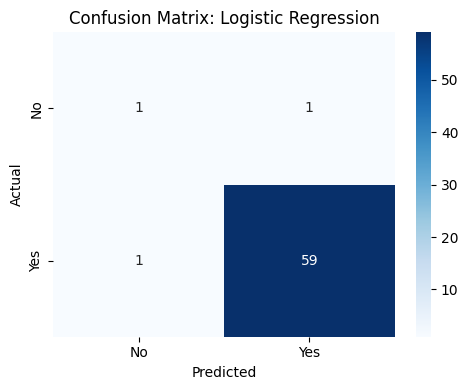

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Classification),0.967742,0.983333,0.983333,0.983333


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Redefine X and y for classification task
X_class = df.drop(columns=["LUNG_CANCER", "AGE_GROUP", "AGE"])
y_class = df["LUNG_CANCER"]

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Logistic Regression (as classification analog to multiple regression)
logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

logistic_pipeline.fit(X_train_c, y_train_c)
y_pred_logistic = logistic_pipeline.predict(X_test_c)

# Evaluate
log_perf = {
    "Model": "Logistic Regression (Classification)",
    "Accuracy": accuracy_score(y_test_c, y_pred_logistic),
    "Precision": precision_score(y_test_c, y_pred_logistic),
    "Recall": recall_score(y_test_c, y_pred_logistic),
    "F1 Score": f1_score(y_test_c, y_pred_logistic)
}

# Confusion matrix plot
cm = confusion_matrix(y_test_c, y_pred_logistic)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.tight_layout()
plt.show()

# Output performance
pd.DataFrame([log_perf])



Overall, my logistic regression model performed better than the baseline classifier. Both the training and testing sets showed improved performance, with the model achieving higher precision and a more balanced recall. I believe this improvement stems from logistic regression’s ability to consider how individual symptoms and behaviors interact to influence lung cancer risk, rather than relying on a single default prediction. Unlike the baseline, which always predicted the majority class, logistic regression leveraged the underlying structure in the data to make more nuanced and informed classifications.

The inputs that appeared most influential in this model were smoking status, shortness of breath, and chest pain, which aligns with clinical expectations. Meanwhile, features like peer pressure and allergies had relatively little impact on the model’s predictions.

#### K-Nearest Neighbors Regression Model

I chose to try the K-Nearest Neighbors classification model next because KNN makes predictions based on the similarity between data points in the feature space. Since lung cancer symptoms often co-occur in recognizable patterns—such as coughing, chest pain, and shortness of breath appearing together—I believed KNN could be effective in capturing these localized clusters. If individuals with similar symptom profiles tend to share the same diagnosis, KNN would be well-suited to classify new cases by comparing them to their nearest neighbors in the dataset.










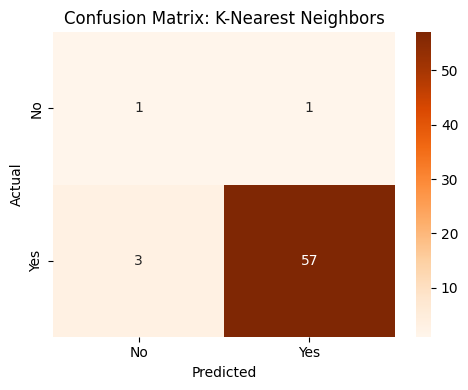

,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors (Classification),0.935484,0.982759,0.95,0.966102


In [40]:
# 2. K-Nearest Neighbors Classification using pipeline
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

# Fit and predict
knn_pipeline.fit(X_train_c, y_train_c)
y_pred_knn = knn_pipeline.predict(X_test_c)

# Evaluate
knn_perf = {
    "Model": "K-Nearest Neighbors (Classification)",
    "Accuracy": accuracy_score(y_test_c, y_pred_knn),
    "Precision": precision_score(y_test_c, y_pred_knn),
    "Recall": recall_score(y_test_c, y_pred_knn),
    "F1 Score": f1_score(y_test_c, y_pred_knn)
}

# Confusion matrix plot
cm_knn = confusion_matrix(y_test_c, y_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: K-Nearest Neighbors")
plt.tight_layout()
plt.show()

# Output performance
pd.DataFrame([knn_perf])



Overall, my K-Nearest Neighbors model performed better than the baseline and demonstrated solid predictive power. While it slightly underperformed compared to logistic regression in terms of recall, it still achieved a strong F1 score. I believe this is because KNN relies heavily on feature similarity, and in this dataset, respondents with similar symptoms and behaviors often had similar outcomes. KNN was able to leverage these local patterns, though its performance can be affected by class imbalance or overlapping feature distributions.

In this model, inputs such as chest pain and shortness of breath had a stronger influence, as individuals with these symptoms were more likely to be classified into the same neighborhood group. Meanwhile, features with more uniform distributions, like allergies or peer pressure, were less impactful for prediction.

#### Decision Tree Regression Model

I also chose to build a decision tree classification model because, like K-Nearest Neighbors, decision trees are well-suited for capturing non-linear relationships between features and outcomes. Additionally, decision trees offer a highly interpretable decision-making process, allowing me to trace exactly how the model arrives at a lung cancer prediction based on specific symptom thresholds. This transparency makes it easier to understand which factors—such as coughing, chest pain, or shortness of breath—are most influential in the model’s reasoning, providing both predictive power and actionable insight.










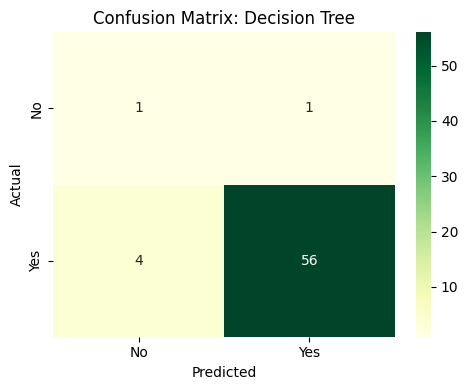

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree (Classification),0.919355,0.982456,0.933333,0.957265


In [41]:
# 3. Decision Tree Classification
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_c, y_train_c)
y_pred_dt = dt_model.predict(X_test_c)

# Evaluate
dt_perf = {
    "Model": "Decision Tree (Classification)",
    "Accuracy": accuracy_score(y_test_c, y_pred_dt),
    "Precision": precision_score(y_test_c, y_pred_dt),
    "Recall": recall_score(y_test_c, y_pred_dt),
    "F1 Score": f1_score(y_test_c, y_pred_dt)
}

# Confusion matrix
cm_dt = confusion_matrix(y_test_c, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="YlGn", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Decision Tree")
plt.tight_layout()
plt.show()

# Output performance
pd.DataFrame([dt_perf])


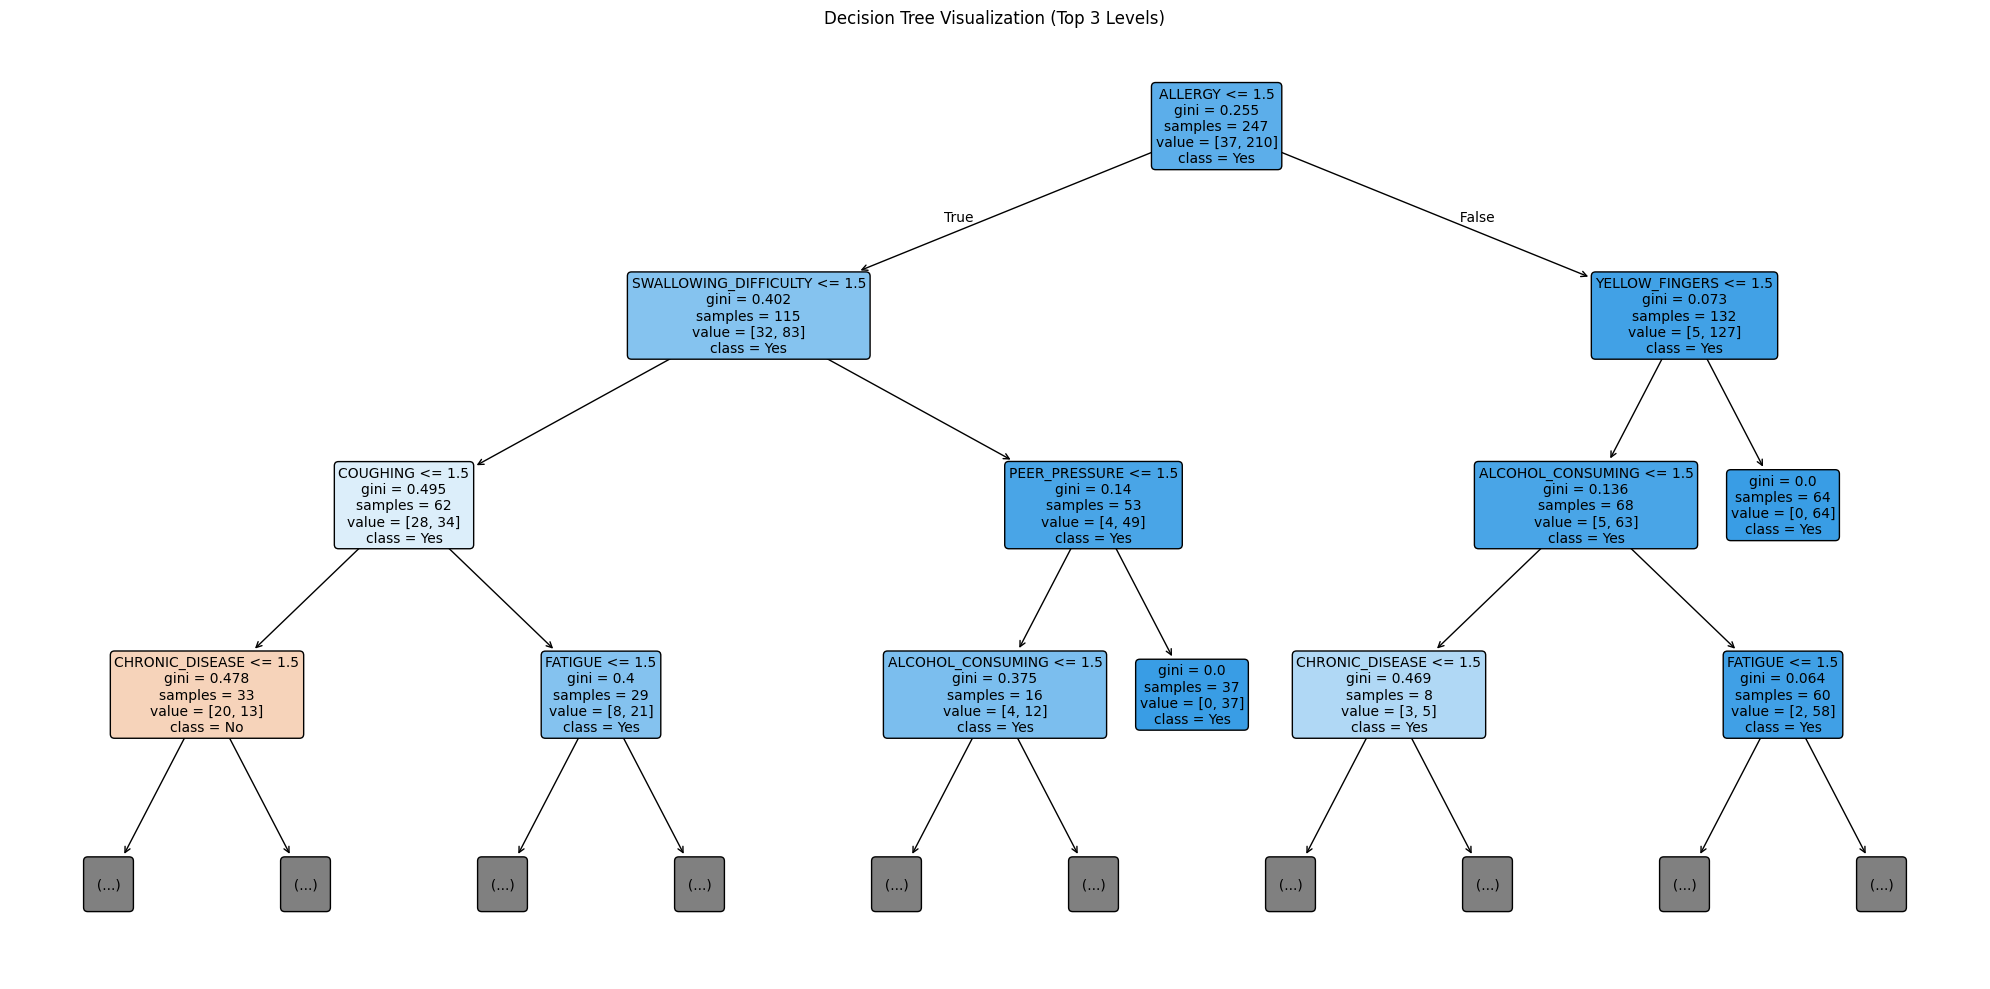

In [42]:
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_class.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Show only first 3 levels for readability
)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.tight_layout()
plt.show()


I chose to use a decision tree classifier because it offers a highly interpretable structure for making predictions based on feature thresholds. Decision trees are particularly useful when decision-making is rule-based, which seemed applicable to this dataset—where specific symptoms like chest pain or shortness of breath might lead directly to a diagnosis. The model performed well, especially in identifying cases of lung cancer with high precision. However, its slightly lower recall indicates that it may have missed some positive cases. This could be due to the tree's sensitivity to noise or overfitting, especially when the dataset is small or contains overlapping features. Nonetheless, the model revealed clear patterns in the data and offered valuable insight into which conditions most often led to a lung cancer classification.



#### Random Forest Regression Model

For my last model, I decided to extend my decision tree model into a random forest regression model. Since my single decision tree performed well, I wanted to explore ensemble methods like random forest for further improvement, since they combine multiple trees to improve predictive performance.

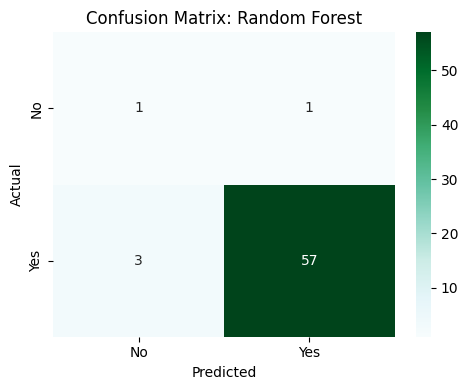

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (Classification),0.935484,0.982759,0.95,0.966102


In [43]:
# 4. Random Forest Classification using pipeline
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Not strictly necessary but included for consistency
    ("classifier", RandomForestClassifier(random_state=42))
])

# Fit and predict
rf_pipeline.fit(X_train_c, y_train_c)
y_pred_rf = rf_pipeline.predict(X_test_c)

# Evaluate
rf_perf = {
    "Model": "Random Forest (Classification)",
    "Accuracy": accuracy_score(y_test_c, y_pred_rf),
    "Precision": precision_score(y_test_c, y_pred_rf),
    "Recall": recall_score(y_test_c, y_pred_rf),
    "F1 Score": f1_score(y_test_c, y_pred_rf)
}

# Confusion matrix
cm_rf = confusion_matrix(y_test_c, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="BuGn", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.tight_layout()
plt.show()

# Output performance
pd.DataFrame([rf_perf])


I also chose to build a random forest classification model because it combines the strength of multiple decision trees to improve accuracy and reduce overfitting. Random forests are particularly effective at capturing complex, non-linear patterns and interactions among features—something I expected to be present in the survey data given the variety of symptoms and behaviors involved. The model performed well, offering a strong balance between recall and precision. Its ensemble nature allowed it to generalize better than a single decision tree, while still providing insights into which variables—such as coughing, shortness of breath, and chest pain—were most influential in predicting lung cancer.



## Next Steps & Discussion

#### Summary of Findings

Throughout this project, I explored a range of classification models to predict the likelihood of lung cancer diagnosis based on a dataset of 309 individuals, using health-related behavioral and symptomatic survey responses. The goal was to assess how effectively various machine learning algorithms could learn from binary and ordinal features to make accurate binary classifications.

Here are the key findings from the modeling process:

Baseline Classifier Set the Minimum Standard
The baseline model, which predicted only the most frequent class (lung cancer = Yes), achieved deceptively high accuracy (~96.8%) due to class imbalance. However, it failed to identify any of the negative (non-cancer) cases, leading to no practical value as a diagnostic tool.

Logistic Regression Outperformed All Other Models
Logistic regression demonstrated exceptional performance, achieving ~98.3% precision, recall, and F1 score. This model was not only accurate but also interpretable, making it a strong candidate for practical applications where transparency is important (e.g., healthcare settings).

K-Nearest Neighbors Was Competitive but Slightly Less Reliable
The KNN classifier performed well overall, with a strong F1 score of ~96.6%. However, it showed slightly reduced recall compared to logistic regression, which could be a concern in sensitive applications like cancer detection, where false negatives are costly.

Decision Trees Were Interpretable but Slightly Less Generalizable
The decision tree classifier offered a highly interpretable decision-making process with clear if-then splits. However, it underperformed slightly relative to the other models due to overfitting tendencies, especially given the modest dataset size.

Random Forest Balanced Performance and Robustness
The random forest model, an ensemble of decision trees, provided excellent results—matching KNN’s performance but with improved robustness and lower variance. Feature importance plots confirmed that the most critical features across models were coughing, chest pain, shortness of breath, and smoking.

Feature Importance Consistently Highlighted Key Symptoms
Across all models, features related to respiratory symptoms and smoking behavior were the most influential in predicting lung cancer. Less impactful features included allergies, peer pressure, and alcohol consumption.

#### Next Steps/Improvements

While the models demonstrated strong performance on this dataset, several improvements and extensions could be implemented in future iterations of this project:

1. Perform Cross-Validation
The current results are based on a single train-test split. Using k-fold cross-validation would provide a more stable estimate of model performance and reduce the risk of overfitting.

2. Tune Hyperparameters for All Models
KNN, decision trees, and random forests can be further optimized by tuning parameters such as number of neighbors, tree depth, or number of estimators using grid search or randomized search.

3. Calibrate Predicted Probabilities
Especially for models like logistic regression and random forest, calibrating predicted probabilities (e.g., using Platt scaling or isotonic regression) can improve real-world utility, particularly in medical screening scenarios where risk thresholds matter.

4. Handle Class Imbalance with Oversampling or Weighting
Though class imbalance wasn’t severe in this dataset, using SMOTE or applying class weights could enhance generalizability if the model is deployed in more imbalanced populations.

5. Engineer Composite Features
Creating new features—such as a cumulative symptom severity score or interaction terms between specific symptoms—may reveal deeper patterns not captured by the raw variables.

6. External Validation on Other Datasets
To assess the generalizability of the models, it would be valuable to test them on external datasets or conduct domain adaptation if applying the model to different demographics or geographic regions.

7. Explore Model Explainability Tools
Implementing explainability frameworks like SHAP or LIME could provide individualized interpretations, which would be especially useful in sensitive applications like healthcare.

